In [2]:
from keras.preprocessing.image import  img_to_array, load_img

target_size = (256,256)
# Get images
Ximg = []

Ximg.append(load_img("latex/PlotNeuralNet/examples/fcn8s/cats.jpg",target_size=target_size))
print(Ximg[0])

<PIL.Image.Image image mode=RGB size=256x256 at 0x7FF084406730>


In [3]:
import numpy as np
Xsub_rgb = []
for img in Ximg:    
    Xsub_rgb.append(img_to_array(img))   
    
print(Xsub_rgb[0].shape)
print(Xsub_rgb[0])

## convert the entire list to numpy array
Xsub_rgb = np.array(Xsub_rgb)

(256, 256, 3)
[[[206. 195. 201.]
  [198. 183. 186.]
  [196. 174. 176.]
  ...
  [208. 198. 209.]
  [202. 186. 196.]
  [189. 169. 178.]]

 [[206. 195. 199.]
  [199. 184. 187.]
  [199. 177. 179.]
  ...
  [207. 197. 208.]
  [201. 185. 195.]
  [188. 168. 177.]]

 [[204. 193. 197.]
  [199. 184. 187.]
  [196. 174. 176.]
  ...
  [207. 195. 207.]
  [200. 183. 193.]
  [185. 165. 174.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [ 34.  75. 107.]
  [ 47.  59. 101.]
  [ 27.  62. 100.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [ 39.  98. 154.]
  [ 42. 118. 170.]
  [ 35. 125. 175.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [ 21. 102. 168.]
  [  0.  97. 146.]
  [ 12. 107. 161.]]]


In [4]:
## Extrat the first few example images
Nsample = Xsub_rgb.shape[0]

def plotMinMax(Xsub_rgb,labels=["R","G","B"]):
    print("______________________________")
    for i, lab in enumerate(labels):
        mi = np.min(Xsub_rgb[:,:,:,i])
        ma = np.max(Xsub_rgb[:,:,:,i])
        print("{} : MIN={:8.4f}, MAX={:8.4f}".format(lab,mi,ma))
        
plotMinMax(Xsub_rgb,labels=["R","G","B"])    

______________________________
R : MIN=  0.0000, MAX=255.0000
G : MIN=  0.0000, MAX=253.0000
B : MIN=  0.0000, MAX=255.0000


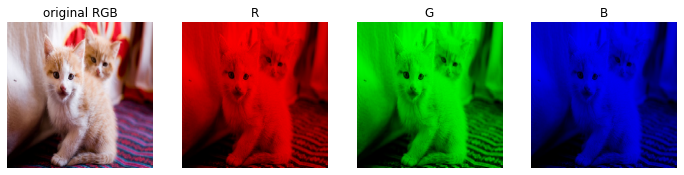

In [5]:
from copy import copy
import matplotlib.pyplot as plt

count = 1
fig = plt.figure(figsize=(12,3*Nsample))
for rgb in Xsub_rgb:
    ## This section plot the original rgb
    ax = fig.add_subplot(Nsample,4,count)
    ax.imshow(rgb/255.0); ax.axis("off")
    ax.set_title("original RGB")
    count += 1
    
    for i, lab in enumerate(["R","G","B"]):
        crgb = np.zeros(rgb.shape)
        crgb[:,:,i] = rgb[:,:,0]
        ax = fig.add_subplot(Nsample,4,count)
        ax.imshow(crgb/255.0); ax.axis("off")
        ax.set_title(lab)
        count += 1
    
plt.show()

In [6]:
Xsub_rgb01 = Xsub_rgb/255.0

In [7]:
from skimage.color import rgb2lab, lab2rgb
Xsub_lab = rgb2lab(Xsub_rgb01)
plotMinMax(Xsub_lab,labels=["L","A","B"])   

______________________________
L : MIN=  0.0000, MAX= 98.9661
A : MIN=-18.3495, MAX= 78.6540
B : MIN=-43.7529, MAX= 53.7469


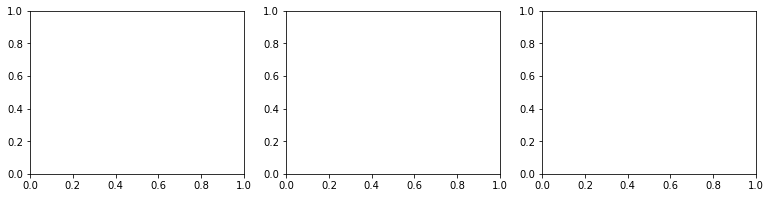

In [26]:
import cv2
def extract_single_dim_from_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = lab2rgb(z)
    return(z)

count = 1
fig = plt.figure(figsize=(13,3*Nsample))
for lab in Xsub_lab:
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = np.array(extract_single_dim_from_LAB_convert_to_RGB(lab,0) *255, dtype=int)
    cv2.imwrite('Test_gray.jpg', lab_rgb_gray)
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = np.array(extract_single_dim_from_LAB_convert_to_RGB(lab,1) *255, dtype=int) 
    cv2.imwrite('reed.jpg', lab_rgb_gray)
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = np.array(extract_single_dim_from_LAB_convert_to_RGB(lab,2) *255, dtype=int)
    cv2.imwrite('yellow.jpg', lab_rgb_gray)
    count += 1
plt.show()